In [63]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
pop_df = pd.read_csv('Resources/utah population 2000-2022 neilsberg.csv', infer_datetime_format=True, parse_dates=True)
permits_df = pd.read_csv('Resources/UTBP1FH.csv')


  pop_df = pd.read_csv('Resources/utah population 2000-2022 neilsberg.csv', infer_datetime_format=True, parse_dates=True)


In [64]:
# Create the Permits DataFrame
permits_df['DATE'] = pd.to_datetime(permits_df['DATE'])
permits_df = permits_df.groupby(pd.Grouper(key='DATE', freq='MS')).sum().reset_index()
permits_df = permits_df[permits_df['DATE'] >= '2000-01-01']

permits_df['Month on Month Change'] = permits_df['UTBP1FH'] - permits_df['UTBP1FH'].shift(1)
permits_df['Percent Change'] = permits_df['UTBP1FH'].pct_change()
permits_df['Total Permits'] = permits_df['UTBP1FH'].cumsum()


permits_df

,DATE,UTBP1FH,Month on Month Change,Percent Change,Total Permits
144,2000-01-01,944.0,NaN,NaN,944.0
145,2000-02-01,1082.0,138.0,0.146186,2026.0
146,2000-03-01,1312.0,230.0,0.212569,3338.0
147,2000-04-01,1343.0,31.0,0.023628,4681.0
148,2000-05-01,1363.0,20.0,0.014892,6044.0
...,...,...,...,...,...
427,2023-08-01,1582.0,94.0,0.063172,364248.0
428,2023-09-01,1211.0,-371.0,-0.234513,365459.0
429,2023-10-01,1258.0,47.0,0.038811,366717.0
430,2023-11-01,1279.0,21.0,0.016693,367996.0


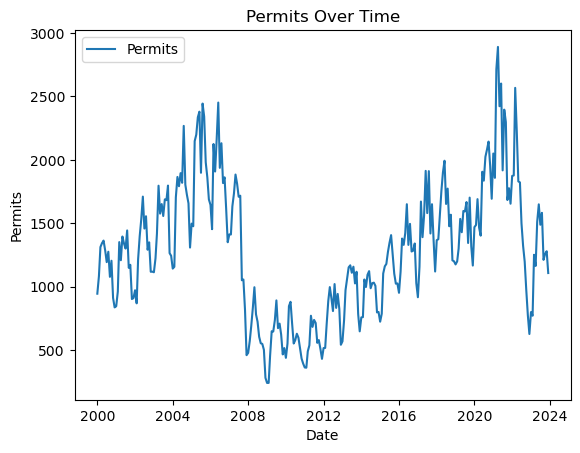

In [65]:
# Plot the data for Permits
plt.plot(permits_df['DATE'], permits_df['UTBP1FH'], label='Permits')
plt.xlabel('Date')
plt.ylabel('Permits')
plt.title('Permits Over Time')
plt.legend()
plt.show()


In [66]:
# convert the date column to datetime64
pop_df['Year'] = pd.to_datetime(pop_df['Year'], format='%Y')
pop_df['Population'] = pop_df['Population'].str.replace(',', '').astype(int)
pop_df['Year on Year Change'] = pop_df['Year on Year Change'].str.replace(',', '').astype(int)
pop_df.rename(columns={'Year': 'DATE'}, inplace=True)
pop_df.head()
pop_df.tail()

,DATE,Population,Year on Year Change,Change in Percent
18,2018-01-01,3155153,51613,1.66%
19,2019-01-01,3203383,48230,1.53%
20,2020-01-01,3283785,80402,2.51%
21,2021-01-01,3339113,55328,1.68%
22,2022-01-01,3380800,41687,1.25%


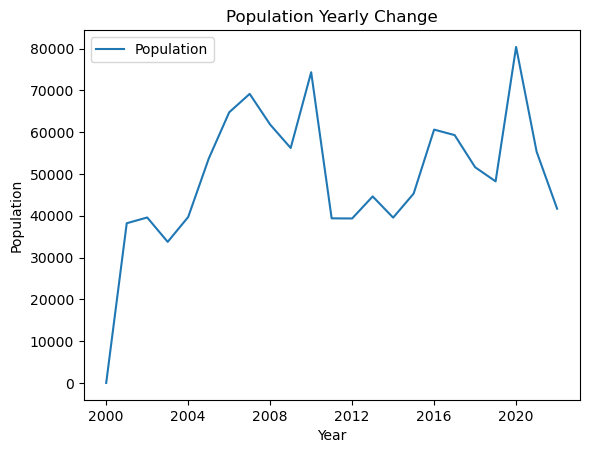

In [67]:
# plot population
plt.plot(pop_df['DATE'], pop_df['Year on Year Change'], label='Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Yearly Change')
plt.legend()
plt.show()

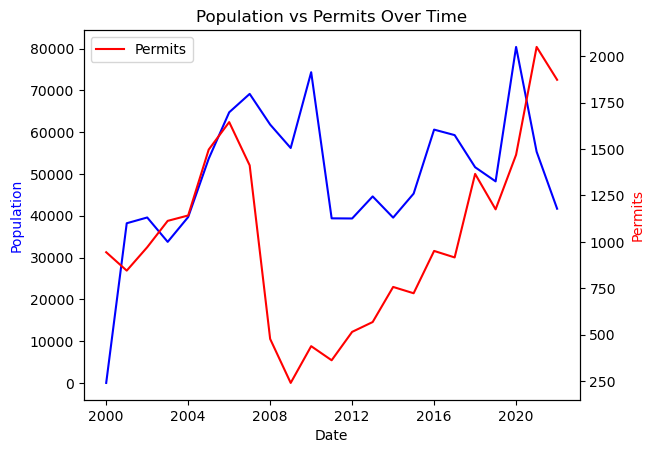

In [68]:
# Merge the two dataframes
merged_df = pd.merge(pop_df, permits_df, on='DATE')

fig, ax1 = plt.subplots()

ax1.plot(merged_df['DATE'], merged_df['Year on Year Change'], label='Population', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Population', color='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['DATE'], merged_df['UTBP1FH'], label='Permits', color='red')
ax2.set_ylabel('Permits', color='red')

plt.title('Population vs Permits Over Time')
plt.legend()
plt.show()


In [69]:
import pickle

with open('Resources/permits_df.pkl', 'wb') as f:
    pickle.dump(permits_df, f)